<a href="https://colab.research.google.com/github/chirag-trivedi/data-science/blob/main/Google_Play_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option("display.float_format", lambda x: "%.2f" % x)

In [19]:
df = pd.read_csv('Play_Store_2.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Paid/Free,Price,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,War Dragons,Others,3.90,160604.00,270.00,10000000.00,Free,0.00,Everyone,Yes,Yes,Yes
1,CV-Library Job Search,BUSINESS,4.40,NaN,46.00,100000.00,Free,0.00,Everyone,No,No,No
2,Surah Al-Waqiah,BOOKS_AND_REFERENCE,NaN,1201.00,29.00,100000.00,Free,0.00,Everyone,Yes,No,No
3,Ay,Others,NaN,11.00,36.00,5000.00,Free,0.00,Teen,Yes,No,No
4,EA Plus,Others,2.50,12.00,12.00,1000.00,Free,0.00,Everyone,No,No,No


In [20]:
df.shape

(4153, 12)

There are 4153 rows and 12 cols

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4153 entries, 0 to 4152
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   App               4153 non-null   object 
 1   Category          4153 non-null   object 
 2   Rating            3976 non-null   float64
 3   Reviews           4029 non-null   float64
 4   Size              4153 non-null   float64
 5   Installs          4153 non-null   float64
 6   Paid/Free         4153 non-null   object 
 7   Price             4153 non-null   float64
 8   Content Rating    4153 non-null   object 
 9   Ad Supported      4153 non-null   object 
 10  In App Purchases  4153 non-null   object 
 11  Editors Choice    4153 non-null   object 
dtypes: float64(5), object(7)
memory usage: 389.5+ KB


There are floats and objects
All cols dont have 4153 observations

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,3976.00,4.19,0.52,1.00,4.00,4.30,4.50,5.00
Reviews,4029.00,66964.21,107418.85,1.00,224.00,7461.00,78219.00,312204.00
Size,4153.00,82.25,92.26,0.01,22.00,42.00,84.00,270.00
Installs,4153.00,3232705.64,5421343.28,1.00,10000.00,500000.00,5000000.00,19970000.00
Price,4153.00,0.57,8.93,0.00,0.00,0.00,0.00,399.99


The ratings range from 1 to 5.The avg rating is 4.19



In [23]:
df.isnull().sum()

,0
App,0
Category,0
Rating,177
Reviews,124
Size,0
Installs,0
Paid/Free,0
Price,0
Content Rating,0
Ad Supported,0


Ratings and Reviews have missing values

In [24]:
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

In [25]:
df['Reviews'] = df['Reviews'].fillna(df['Reviews'].median())

In [26]:
df.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Paid/Free,0
Price,0
Content Rating,0
Ad Supported,0


EDA Univariate Analysis

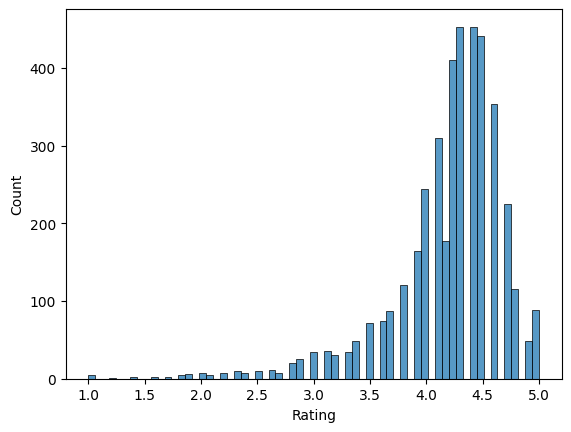

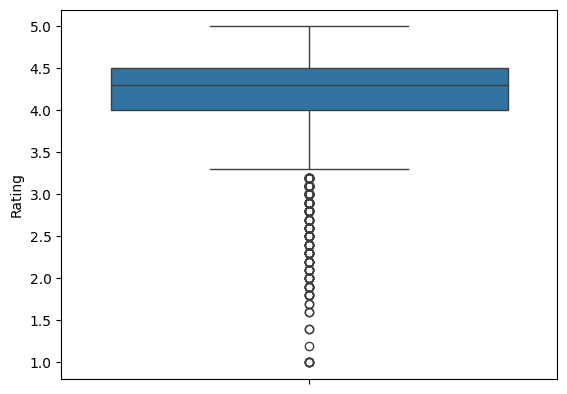

In [27]:
sns.histplot(df['Rating']);
plt.show();
sns.boxplot(df['Rating']);
plt.show();

Left skewed distribution observed

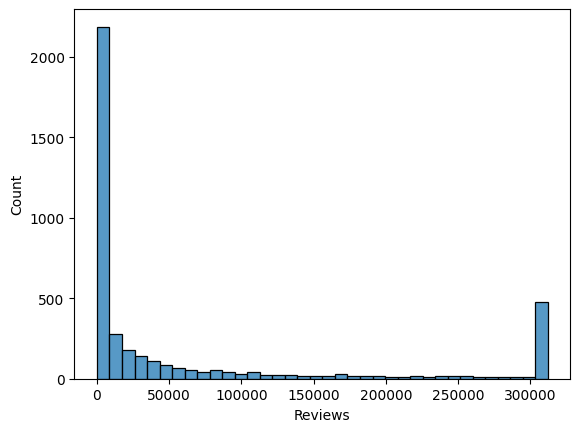

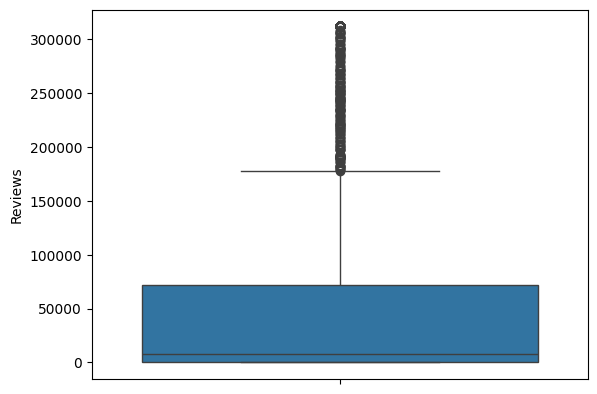

In [28]:
sns.histplot(df['Reviews']);
plt.show();
sns.boxplot(df['Reviews']);
plt.show();

Right skewed distribution with lots of outliers

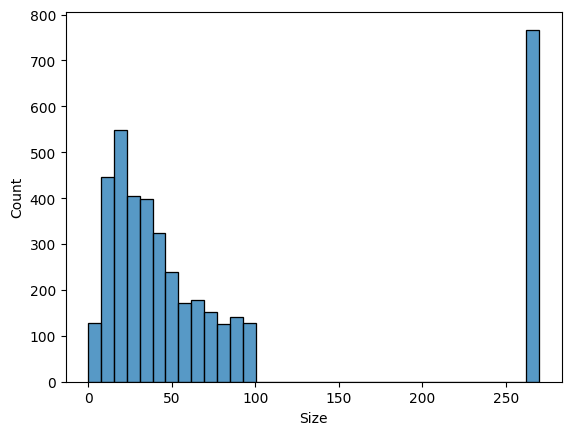

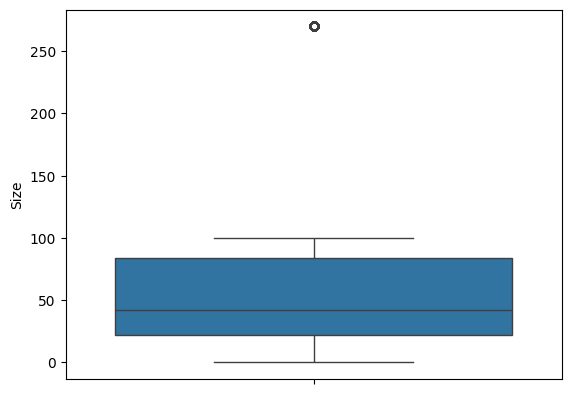

In [29]:
sns.histplot(df['Size']);
plt.show();
sns.boxplot(df['Size']);
plt.show();

Size is upto 100 KB with some outliers

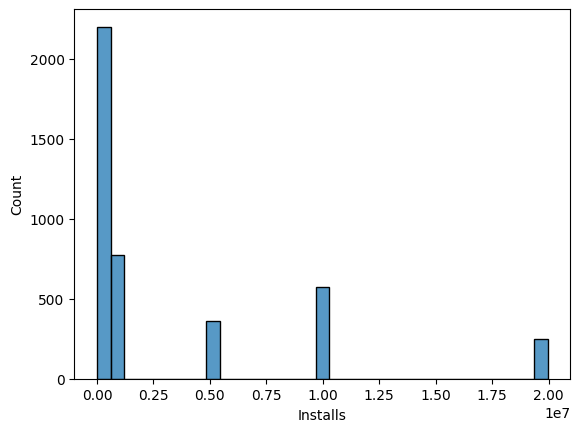

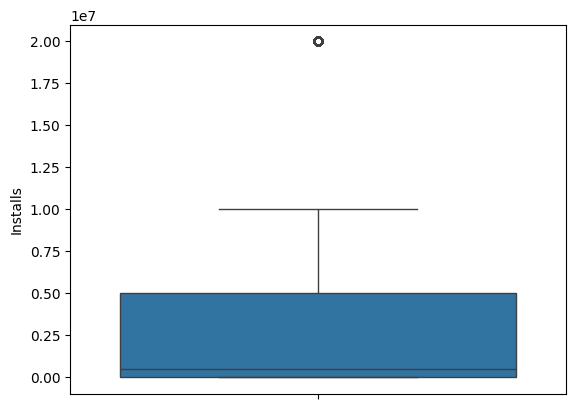

In [30]:
sns.histplot(df['Installs']);
plt.show();
sns.boxplot(df['Installs']);
plt.show();

Random distribution

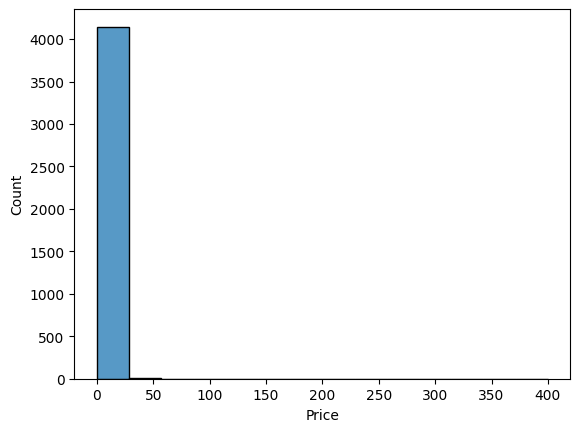

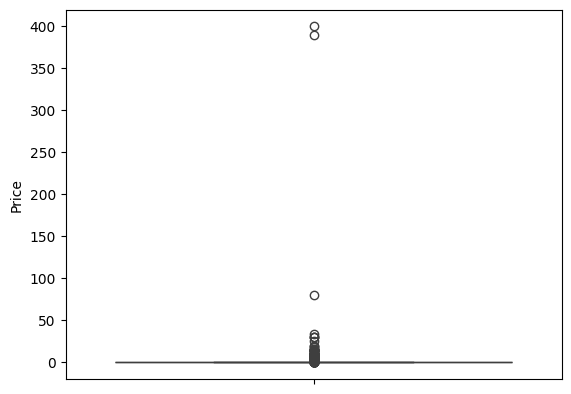

In [31]:
sns.histplot(df['Price']);
plt.show();
sns.boxplot(df['Price']);
plt.show();

Most apps are free but some outliers are observed

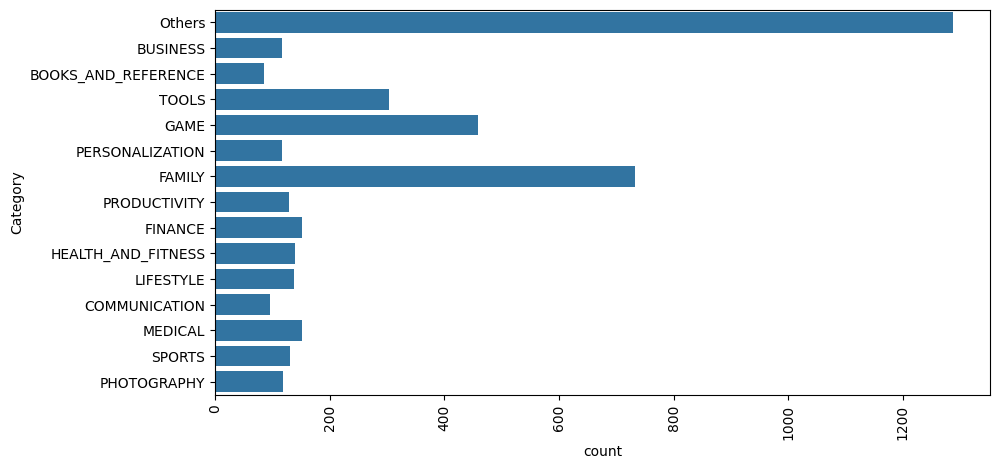

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(df['Category'])
plt.xticks(rotation=90)
plt.show();

Most of the apps are in family , others and game

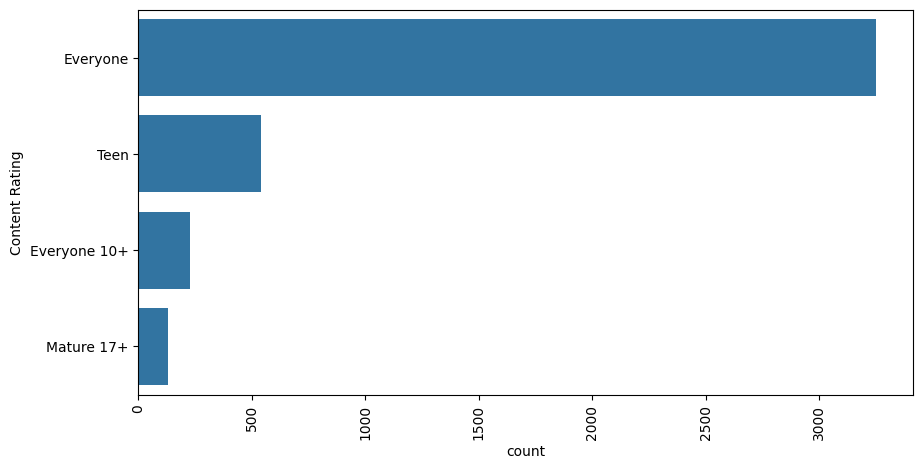

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(df['Content Rating'])
plt.xticks(rotation=90)
plt.show();

Most are rated E but there are Teen as well

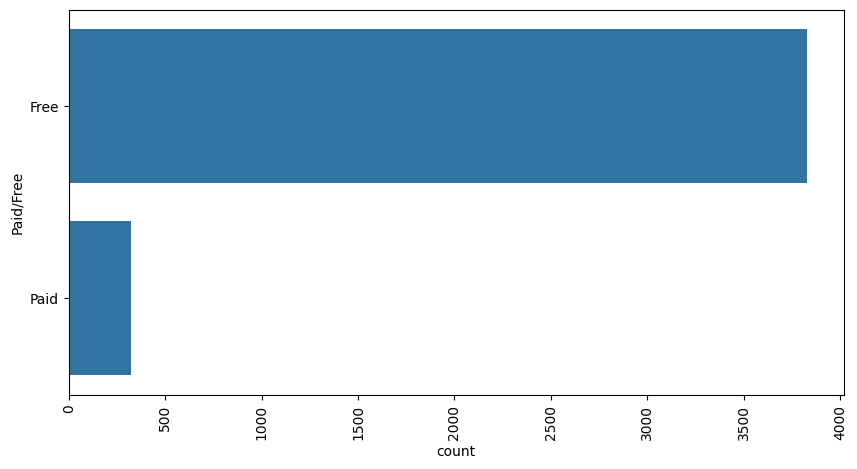

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(df['Paid/Free'])
plt.xticks(rotation=90)
plt.show();

Most are free but there are some paid

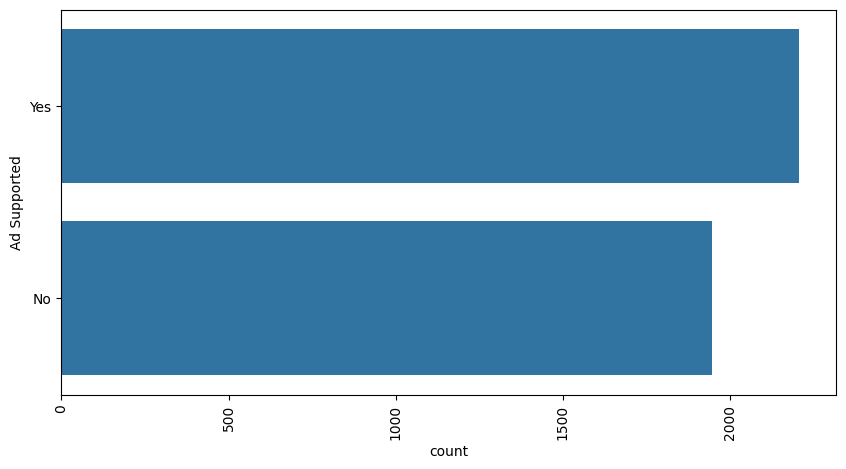

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(df['Ad Supported'])
plt.xticks(rotation=90)
plt.show();

Some apps have ads supported some dont

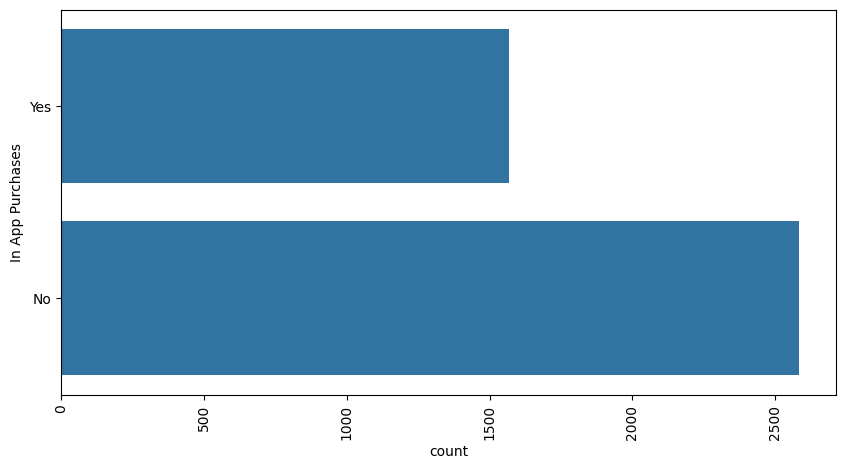

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(df['In App Purchases'])
plt.xticks(rotation=90)
plt.show();

Most apps dont have in app purchases others dont

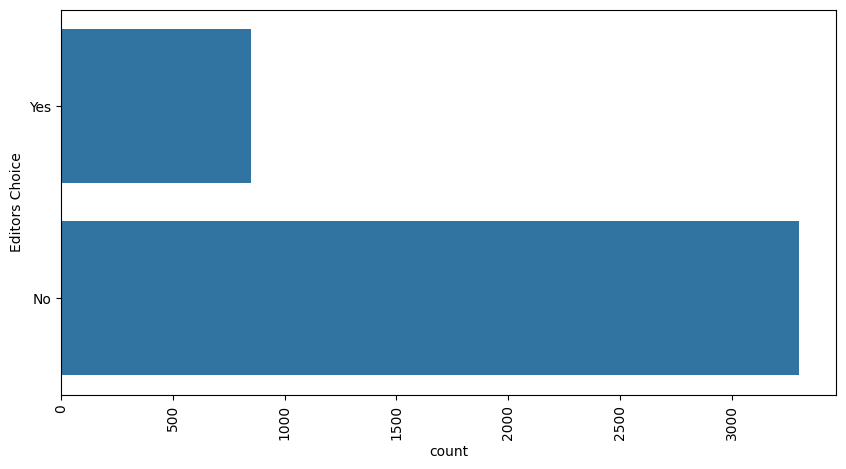

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(df['Editors Choice'])
plt.xticks(rotation=90)
plt.show();

Most apps dont ahve editors choice some do

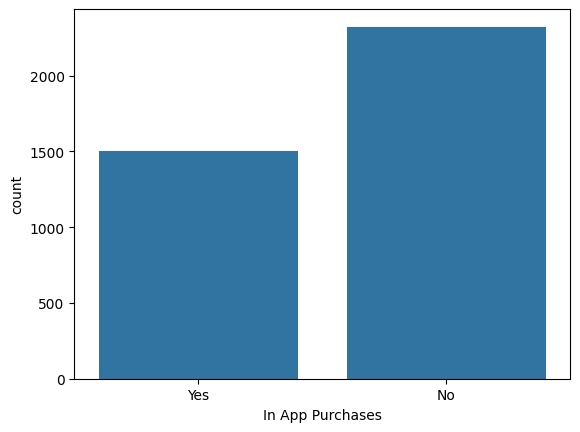

In [39]:
sns.countplot(data=df[df['Paid/Free']=='Free'], x='In App Purchases');
plt.show();

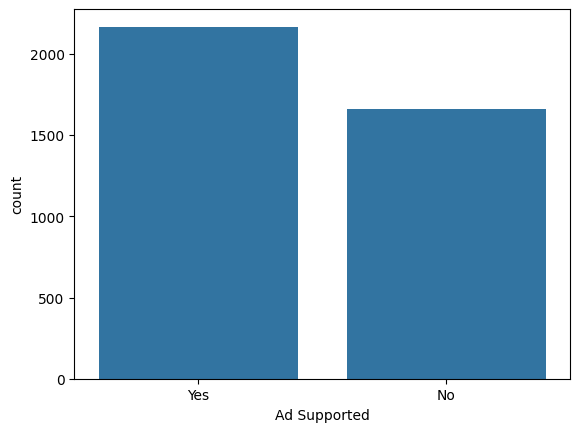

In [40]:
sns.countplot(data=df[df['Paid/Free']=='Free'], x='Ad Supported');
plt.show();

Bivariate Analysis

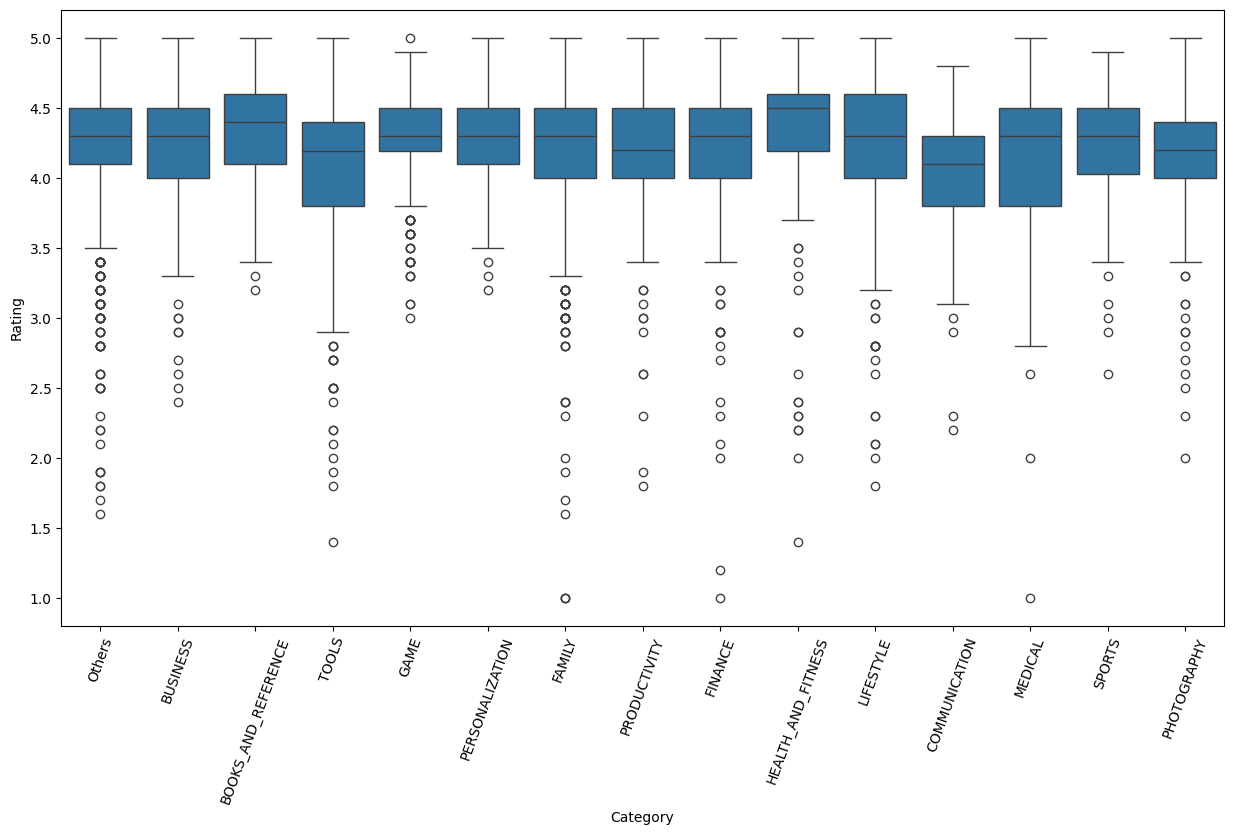

In [41]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='Category', y='Rating')
plt.xticks(rotation=70)
plt.show();

Most of the categories have a median rating of 4 and above.There are some outliers observed

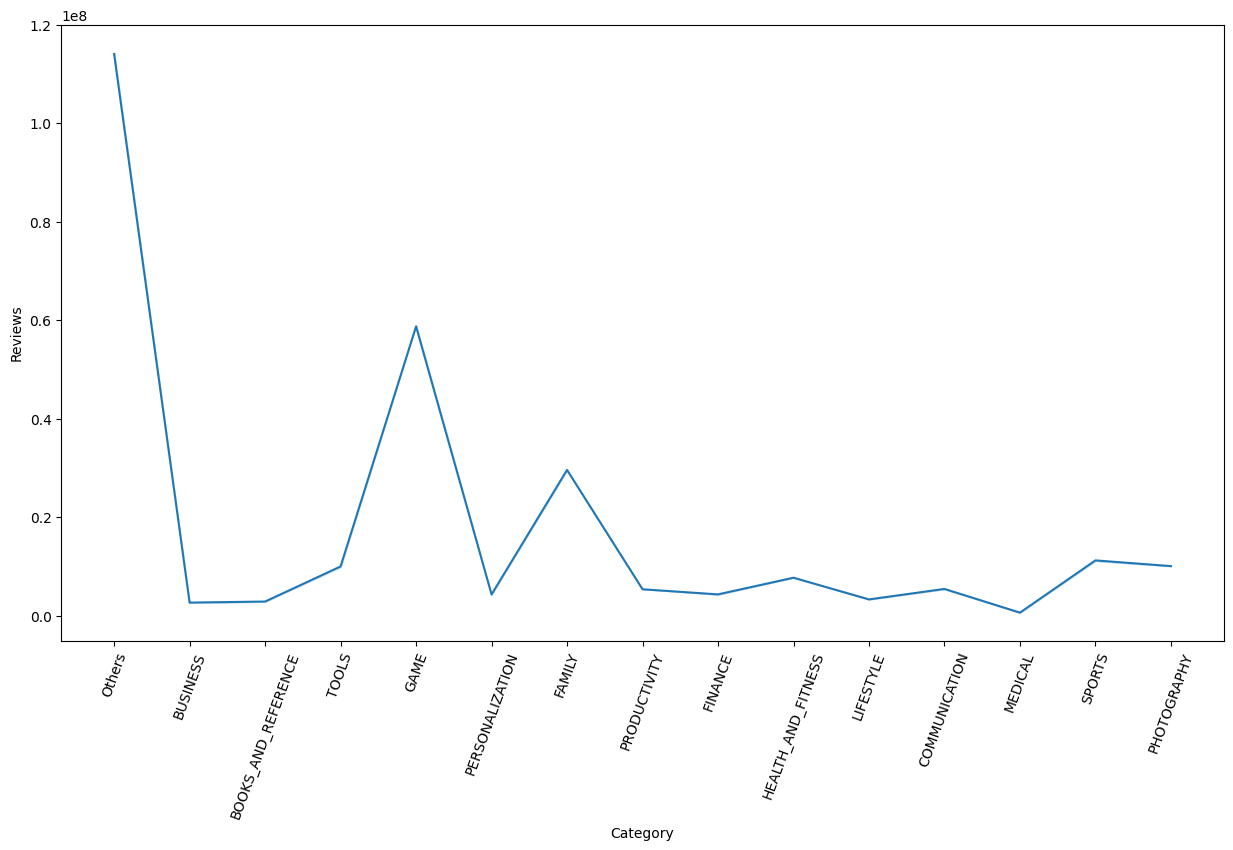

In [43]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df, x='Category', y='Reviews', errorbar=('ci', False),estimator='sum');
plt.xticks(rotation=70);
plt.show();

The Others category has the max no of installs

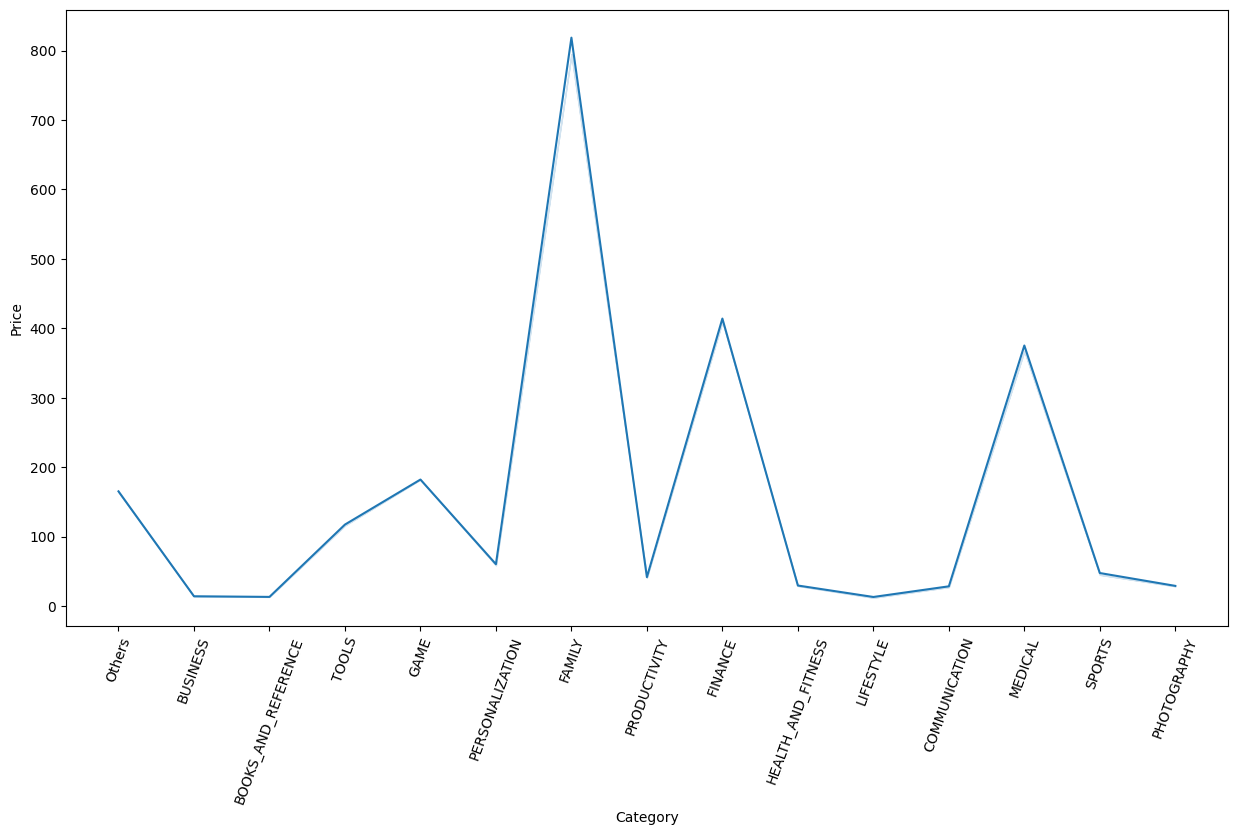

In [45]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df, x='Category', y='Price', errorbar=('ci', False),estimator='sum');
plt.xticks(rotation=70);
plt.show();